# Polynomial Curve fitting
<a href="https://colab.research.google.com/github/surajx/AIFS/blob/master/labs/Machine%20Learning/Polinomial_curve_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the necessary Libraries

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

np.random.seed(8698)

## Generate Synthetic data

In [2]:
NUM_DATA_POINTS = 10

In [3]:
def data_gen_process(x):
    return np.sin(2*np.pi*x)

def gen_sine_samples(num_samples):
    x = np.sort(np.random.rand(num_samples))
    y = data_gen_process(x) + np.random.normal(0, 0.3, num_samples)
    return x, y

def load_generated_data(num_train_samples=50):
    X_train, y_train = gen_sine_samples(num_train_samples)    

    return X_train, y_train

In [4]:
X_train, y_train = load_generated_data(NUM_DATA_POINTS)

In [5]:
X_true = np.linspace(0, 1, 1000) # generating 1000 x-valued betweeen 0 and 1
y_true = data_gen_process(X_true) # generating true data (without noise) for X_true

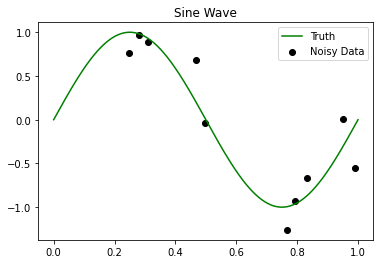

In [11]:
plt.title("Sine Wave")
plt.plot(X_true, y_true, color="green", label="Truth")
plt.scatter(X_train, y_train, color="black", label="Noisy Data");
plt.legend(loc="best");

In [7]:
M_list = [1, 3, 9]

## Direct Implementation

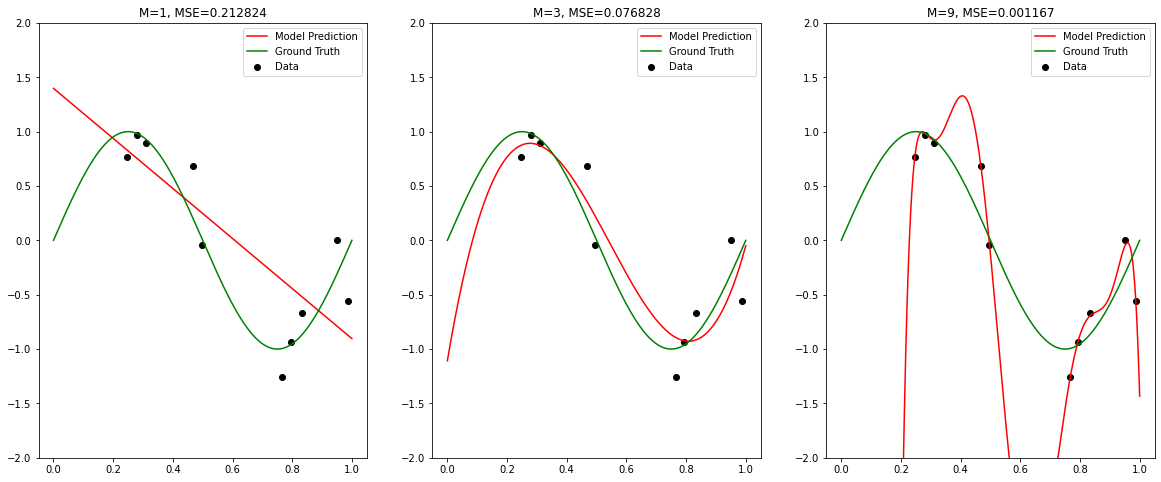

In [8]:
# Define the Order of the polynomial. This defines the Capacity of the Model
w_star_list = []
plt.figure(figsize=(20, 8))
plt_cnt = 1
for M in M_list:
     
    # Set subplot
    ax = plt.subplot(1, len(M_list), plt_cnt)
    # plt.setp(ax, xticks=(), yticks=())

    # Convert to polynomial features
    X_train_features = np.vander(X_train, N=M+1, increasing=True)
    X_true_features = np.vander(X_true, N=M+1, increasing=True)

    # Convert to matrix format for evaluating closed for solution
    y_train_mat = np.expand_dims(y_train, axis=1)

    # Evaluate closed-form solution
    X_T_X = np.matmul(X_train_features.T, X_train_features)
    X_T_X_inv = np.linalg.inv(X_T_X)
    X_T_X_inv_X_T = np.matmul(X_T_X_inv, X_train_features.T)
    w_star = X_T_X_inv_X_T_y = np.matmul(X_T_X_inv_X_T, y_train_mat)

    w_star_list.append(w_star)

    y_model_pred = np.matmul(X_true_features, w_star) # Model prediction

    mse = np.mean(np.square(np.matmul(X_train_features, w_star) - y_train_mat))

    plt.ylim((-2, 2))
    plt.title("M={}, MSE={:.6f}".format(M, mse))
    plt.scatter(X_train, y_train, color="black", label="Data")
    plt.plot(X_true, y_model_pred, color="red", label="Model Prediction")
    plt.plot(X_true, y_true, color="green", label="Ground Truth")
    plt.legend(loc="best")
    plt_cnt += 1

In [17]:
for idx in range(len(M_list)):
    print("M={}\nw_star=\n{}\n".format(M_list[idx],w_star_list[idx]))

M=1
w_star=
[[ 1.39811339]
 [-2.30175373]]

M=3
w_star=
[[ -1.10712781]
 [ 16.29622498]
 [-39.48487129]
 [ 24.24649257]]

M=9
w_star=
[[-7.29615294e+02]
 [ 1.22556271e+04]
 [-8.61344485e+04]
 [ 3.29722156e+05]
 [-7.47447020e+05]
 [ 1.01699164e+06]
 [-7.89546060e+05]
 [ 2.85853107e+05]
 [-5.91138213e+02]
 [-2.03756809e+04]]



## Using `sk-learn`



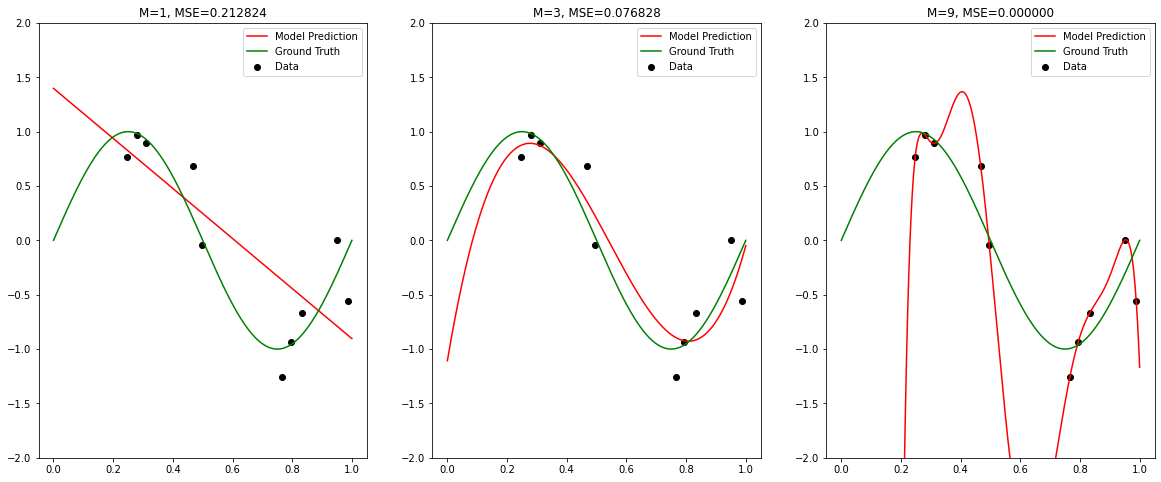

In [10]:
# Define the Order of the polynomial. This defines the Capacity of the Model
plt.figure(figsize=(20, 8))
plt_cnt = 1
for M in M_list:
     
    # Set subplot
    ax = plt.subplot(1, len(M_list), plt_cnt)
    # plt.setp(ax, xticks=(), yticks=())

    # Convert to matrix format
    X_train_mat = np.expand_dims(X_train, axis=1)
    X_true_mat = np.expand_dims(X_true, axis=1)

    model = make_pipeline(PolynomialFeatures(M), LinearRegression())
    model.fit(X_train_mat, y_train)


    y_model_pred = model.predict(X_true_mat) # Model prediction

    mse = mean_squared_error(y_train, model.predict(X_train_mat))

    plt.ylim((-2, 2))
    plt.title("M={}, MSE={:.6f}".format(M, mse))
    plt.scatter(X_train, y_train, color="black", label="Data")
    plt.plot(X_true, y_model_pred, color="red", label="Model Prediction")
    plt.plot(X_true, y_true, color="green", label="Ground Truth")
    plt.legend(loc="best")
    plt_cnt += 1